In [ ]:
import soundfile as sf
import numpy as np
import scipy.signal as sig
import time
import matplotlib.pyplot as plt

Importo las señales de audio

In [ ]:
s_cerca,fs = sf.read('piano_cerca.wav')
s_lejos,_ = sf.read('piano_lejos.wav')

Las grafico, para tener una idea de la situación

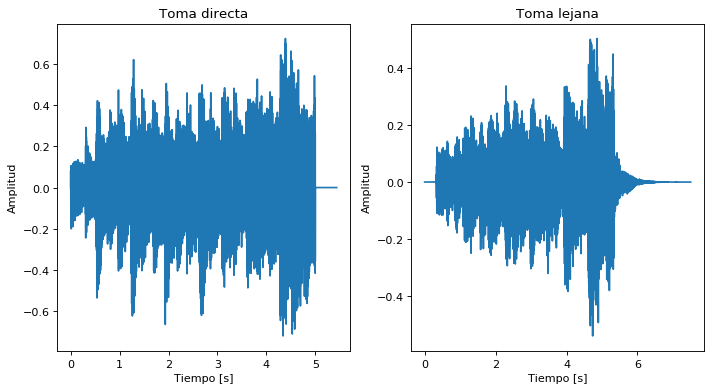

In [ ]:
t1 = np.linspace(0,len(s_cerca)/fs,num = len(s_cerca))
t2 = np.linspace(0,len(s_lejos)/fs,num = len(s_lejos))
plt.figure(figsize=(9, 5), dpi=80)
plt.subplot(1,2,1)
plt.plot(t1,s_cerca)
plt.ylabel('Amplitud')
plt.xlabel('Tiempo [s]')
plt.title('Toma directa')
plt.subplot(1,2,2)
plt.plot(t2,s_lejos)
plt.ylabel('Amplitud')
plt.xlabel('Tiempo [s]')
plt.title('Toma lejana')
plt.tight_layout()

Se ve que la toma lejana está retrasada con respecto a la directa.

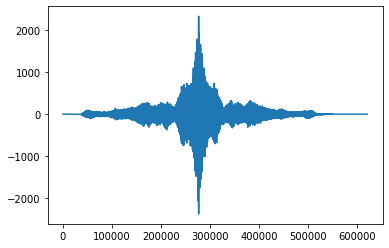

In [ ]:
corr_s = sig.correlate(s_lejos,s_cerca)
plt.plot(corr_s)

¿Qué significa el eje X en este caso?

In [ ]:
def correlation_lags(in1_len, in2_len, mode='full'):
    r"""
    Calculates the lag / displacement indices array for 1D cross-correlation.
    Parameters
    ----------
    in1_size : int
        First input size.
    in2_size : int
        Second input size.
    mode : str {'full', 'valid', 'same'}, optional
        A string indicating the size of the output.
        See the documentation `correlate` for more information.
    See Also
    --------
    correlate : Compute the N-dimensional cross-correlation.
    Returns
    -------
    lags : array
        Returns an array containing cross-correlation lag/displacement indices.
        Indices can be indexed with the np.argmax of the correlation to return
        the lag/displacement.
    Notes
    -----
    Cross-correlation for continuous functions :math:`f` and :math:`g` is
    defined as:
    .. math ::
        \left ( f\star g \right )\left ( \tau \right )
        \triangleq \int_{t_0}^{t_0 +T}
        \overline{f\left ( t \right )}g\left ( t+\tau \right )dt
    Where :math:`\tau` is defined as the displacement, also known as the lag.
    Cross correlation for discrete functions :math:`f` and :math:`g` is
    defined as:
    .. math ::
        \left ( f\star g \right )\left [ n \right ]
        \triangleq \sum_{-\infty}^{\infty}
        \overline{f\left [ m \right ]}g\left [ m+n \right ]
    Where :math:`n` is the lag.
    Examples
    --------
    Cross-correlation of a signal with its time-delayed self.
    >>> from scipy import signal
    >>> from numpy.random import default_rng
    >>> rng = default_rng()
    >>> x = rng.standard_normal(1000)
    >>> y = np.concatenate([rng.standard_normal(100), x])
    >>> correlation = signal.correlate(x, y, mode="full")
    >>> lags = signal.correlation_lags(x.size, y.size, mode="full")
    >>> lag = lags[np.argmax(correlation)]
    """

    # calculate lag ranges in different modes of operation
    if mode == "full":
        # the output is the full discrete linear convolution
        # of the inputs. (Default)
        lags = np.arange(-in2_len + 1, in1_len)
    elif mode == "same":
        # the output is the same size as `in1`, centered
        # with respect to the 'full' output.
        # calculate the full output
        lags = np.arange(-in2_len + 1, in1_len)
        # determine the midpoint in the full output
        mid = lags.size // 2
        # determine lag_bound to be used with respect
        # to the midpoint
        lag_bound = in1_len // 2
        # calculate lag ranges for even and odd scenarios
        if in1_len % 2 == 0:
            lags = lags[(mid-lag_bound):(mid+lag_bound)]
        else:
            lags = lags[(mid-lag_bound):(mid+lag_bound)+1]
    elif mode == "valid":
        # the output consists only of those elements that do not
        # rely on the zero-padding. In 'valid' mode, either `in1` or `in2`
        # must be at least as large as the other in every dimension.

        # the lag_bound will be either negative or positive
        # this let's us infer how to present the lag range
        lag_bound = in1_len - in2_len
        if lag_bound >= 0:
            lags = np.arange(lag_bound + 1)
        else:
            lags = np.arange(lag_bound, 1)
    return lags

In [ ]:
lags = correlation_lags(len(s_lejos), len(s_cerca))

Text(0.5, 1.0, 'Correlación cruzada entre las tomas')

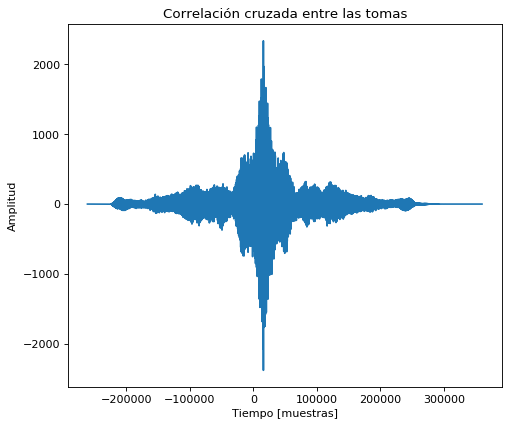

In [ ]:
plt.figure(figsize=(7, 6), dpi=80)
plt.plot(lags,corr_s)
plt.ylabel('Amplitud')
plt.xlabel('Tiempo [muestras]')
plt.title('Correlación cruzada entre las tomas')

Buscamos la máxima correlación, en ese punto las señales quedarán alineadas.

In [ ]:
lag = lags[np.argmax(corr_s)]
print('La toma de lejos está retrasada '+ str(lag) +' muestras con respecto a la toma directa')

La toma de lejos está retrasada 15907 muestras con respecto a la toma directa


Alíneo las señales

In [ ]:
s_lejos_alineada = s_lejos[lag:]

Confirmo que todo esté bien

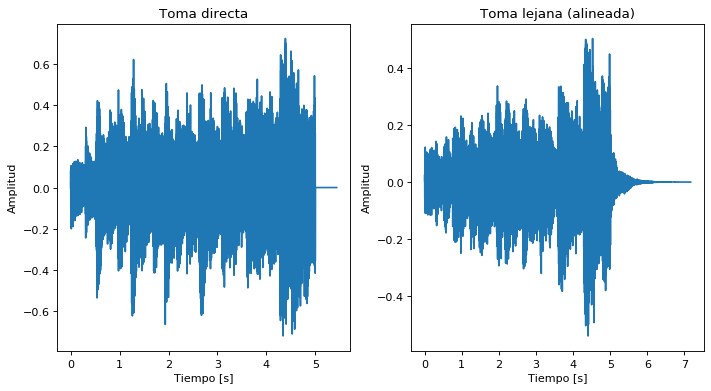

In [ ]:
t2 = np.linspace(0,len(s_lejos_alineada)/fs,num = len(s_lejos_alineada))
plt.figure(figsize=(9, 5), dpi=80)
plt.subplot(1,2,1)
plt.plot(t1,s_cerca)
plt.ylabel('Amplitud')
plt.xlabel('Tiempo [s]')
plt.title('Toma directa')
plt.subplot(1,2,2)
plt.plot(t2,s_lejos_alineada)
plt.ylabel('Amplitud')
plt.xlabel('Tiempo [s]')
plt.title('Toma lejana (alineada)')
plt.tight_layout()

# Extra

Text(0.5, 1.0, 'Diferencias entre cálculos de correlación')

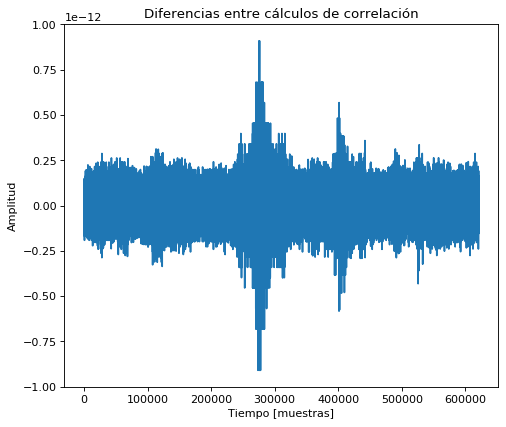

In [ ]:
t1= time.time()
corr_scipy = sig.correlate(s_lejos,s_cerca)
t2 = time.time()-t1
t3 = time.time()
corr_numpy = np.correlate(s_lejos,s_cerca,'full')
t4 = time.time()-t3
plt.figure(figsize=(7, 6), dpi=80)
plt.plot(corr_scipy-corr_numpy)
plt.ylabel('Amplitud')
plt.xlabel('Tiempo [muestras]')
plt.title('Diferencias entre cálculos de correlación')


In [ ]:
print('El tiempo de ejecución de la versión de Scipy fue: ' + str(round(t2,2))+ ' s')
print('El tiempo de ejecución de la versión de Numpy fue: ' + str(round(t4,2))+ ' s')

El tiempo de ejecución de la versión de Scipy fue: 0.02 s
El tiempo de ejecución de la versión de Numpy fue: 4.48 s
